In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

used to represent the continues relationship between two values

In [6]:
import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip"
response = requests.get(url)

In [8]:
with open("dataset.zip", "wb") as file:
    file.write(response.content)

In [11]:
#data
df=pd.read_csv('dataset.zip',parse_dates=[3])

In [12]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


## datacleaning

In [13]:
df.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df['Day'] = df.Timestamp.dt.date
df['Month'] = df.Timestamp.dt.month
df['Hour'] = df.Timestamp.dt.hour

In [14]:
park = df[df.Location.isin(['Broad Street', 'NIA South'])]

In [15]:
park.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04,10,9


# Basics

In [19]:
blue, orange, green, red = sns.color_palette()[:4]

sns.set_style('white')
months = [pd.Timestamp(2016, 10, 1), 
        pd.Timestamp(2016, 11, 1),
        pd.Timestamp(2016, 12, 1)]
plt.rc('date.autoformatter', day='%b %Y')

([<matplotlib.axis.XTick at 0x17536876090>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

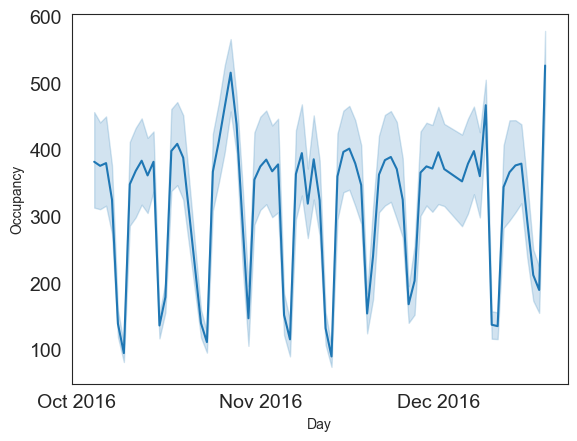

In [22]:
sns.lineplot(x=park.Day,y=park.Occupancy)
plt.xticks(months)

<Axes: xlabel='Hour', ylabel='Occupancy'>

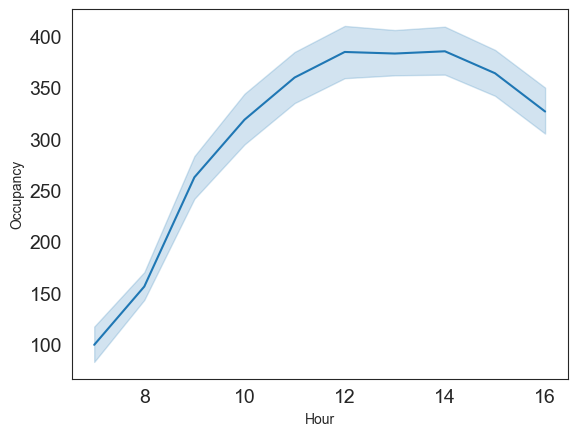

In [23]:
sns.lineplot(x=park.Hour,y=park.Occupancy)


### bootstraping is the process of random samplingwith replacement

<Axes: xlabel='Hour', ylabel='Occupancy'>

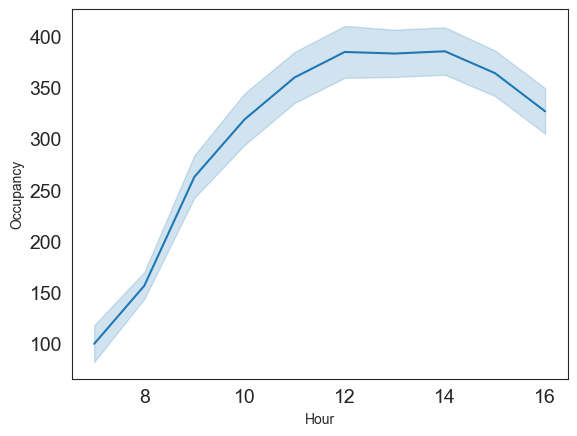

In [25]:
#n_boot: used to defining the number of bootstrapping models used at a time
sns.lineplot(x=park.Hour,y=park.Occupancy,n_boot=10000)

<Axes: xlabel='Hour', ylabel='Occupancy'>

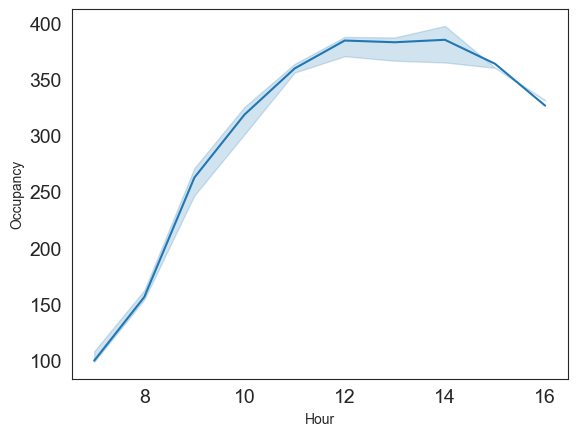

In [28]:
sns.lineplot(x=park.Hour,y=park.Occupancy,n_boot=2)

## confidence interval

C:\Users\hp\AppData\Local\Temp\ipykernel_9048\5928719.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 20)` for the same effect.

  sns.lineplot(x=park.Hour,y=park.Occupancy,


<Axes: xlabel='Hour', ylabel='Occupancy'>

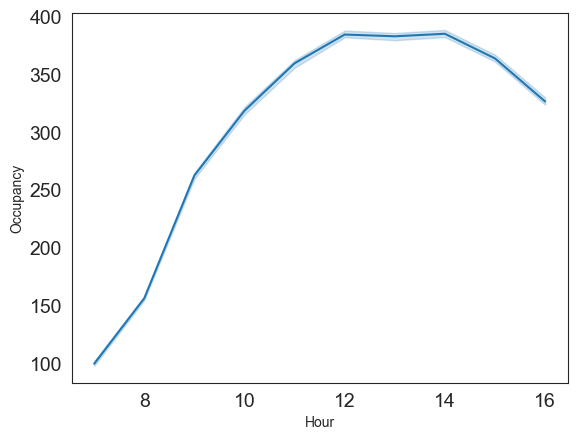

In [29]:
sns.lineplot(x=park.Hour,y=park.Occupancy,
             ci=20)#20% ci

C:\Users\hp\AppData\Local\Temp\ipykernel_9048\2084772370.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 88)` for the same effect.

  sns.lineplot(x=park.Hour,y=park.Occupancy,


<Axes: xlabel='Hour', ylabel='Occupancy'>

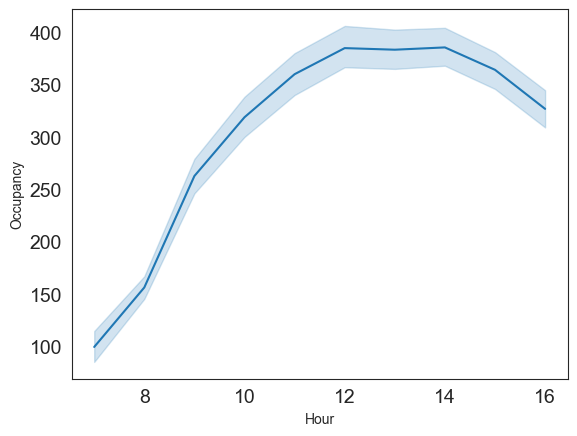

In [30]:
sns.lineplot(x=park.Hour,y=park.Occupancy,
             ci=88)#20% ci

C:\Users\hp\AppData\Local\Temp\ipykernel_9048\2936277351.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=park.Hour,y=park.Occupancy,


<Axes: xlabel='Hour', ylabel='Occupancy'>

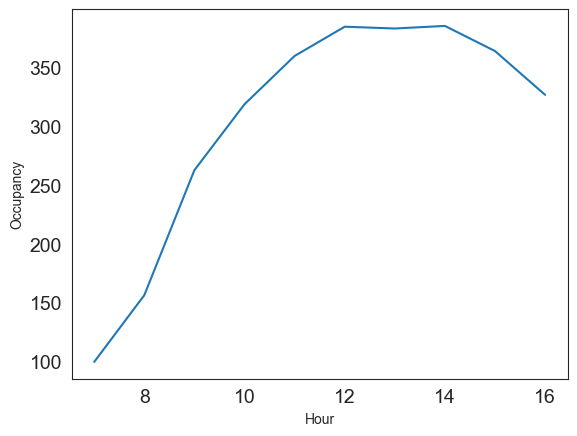

In [31]:
sns.lineplot(x=park.Hour,y=park.Occupancy,
             ci=None)#20% ci

## estimators

<Axes: xlabel='Hour', ylabel='Occupancy'>

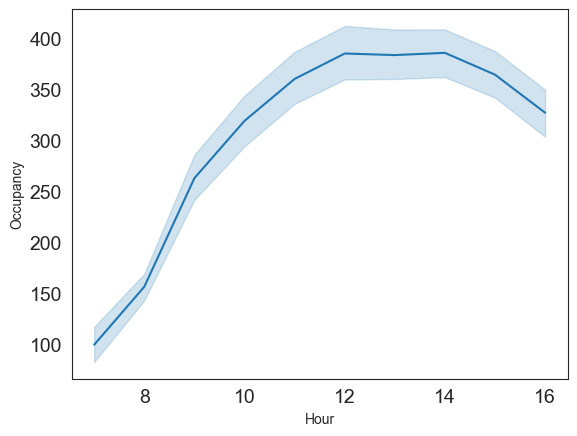

In [32]:
sns.lineplot(x=park.Hour,y=park.Occupancy,
             estimator='mean')#mean as estimator

sum

<Axes: xlabel='Hour', ylabel='Occupancy'>

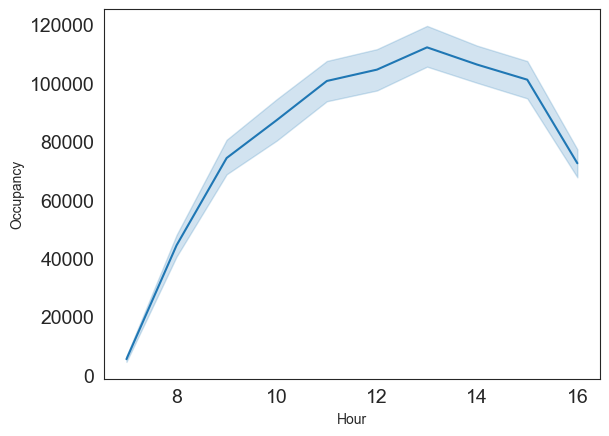

In [33]:
sns.lineplot(x=park.Hour,y=park.Occupancy,
             estimator='sum')#sum as estimator

## visual semantics

hue

<Axes: xlabel='Hour', ylabel='Occupancy'>

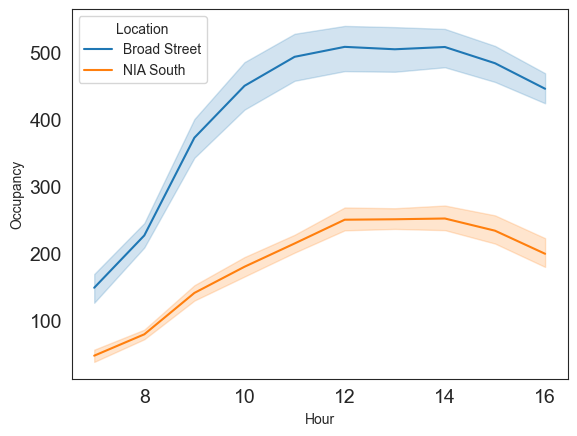

In [34]:
sns.lineplot(x=park.Hour,y=park.Occupancy,
             hue=park.Location)

<Axes: xlabel='Hour', ylabel='Occupancy'>

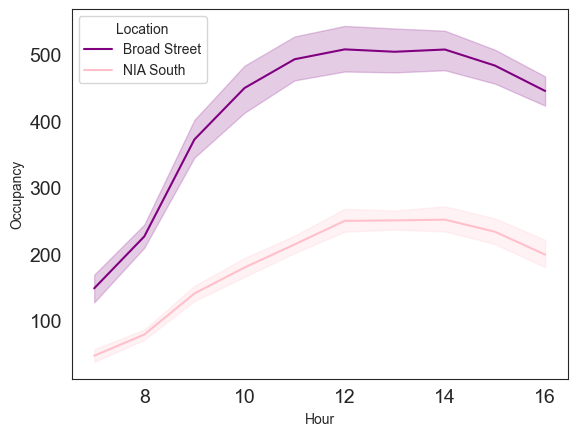

In [35]:
#customize the color
sns.lineplot(x=park.Hour,y=park.Occupancy,
             hue=park.Location,
             palette=['purple','pink'])

Style

<Axes: xlabel='Hour', ylabel='Occupancy'>

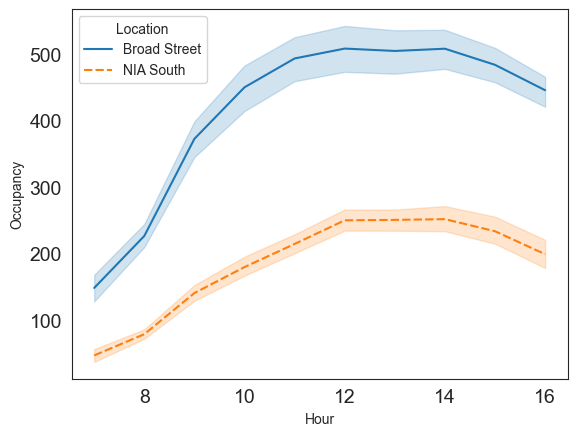

In [39]:
sns.lineplot(x=park.Hour,y=park.Occupancy,hue=park.Location,
             style=park.Location)

Size

<Axes: xlabel='Hour', ylabel='Occupancy'>

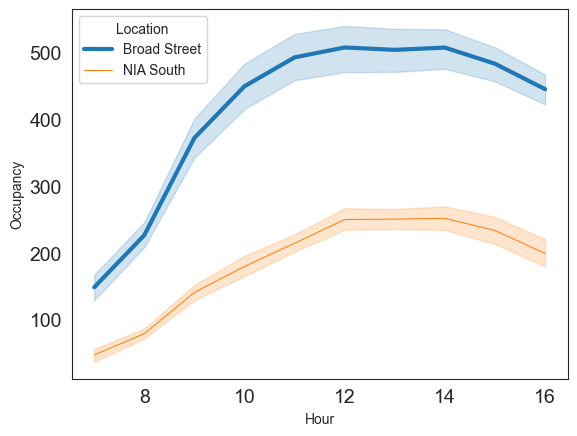

In [40]:
sns.lineplot(x=park.Hour,y=park.Occupancy,hue=park.Location,
             size=park.Location)# size of the line

## normal styling

<Axes: xlabel='Hour', ylabel='Occupancy'>

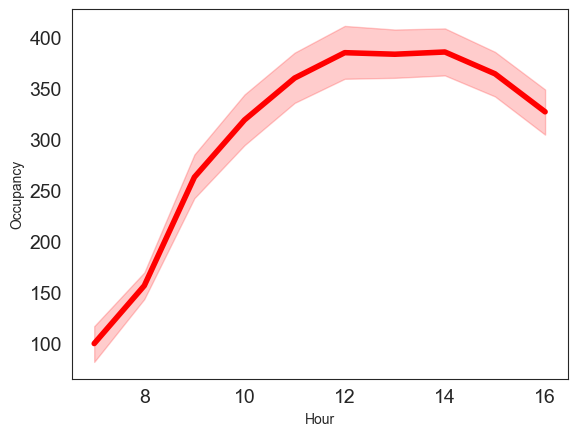

In [42]:
sns.lineplot(x=park.Hour,y=park.Occupancy,lw=4,color='red')

<Axes: xlabel='Hour', ylabel='Occupancy'>

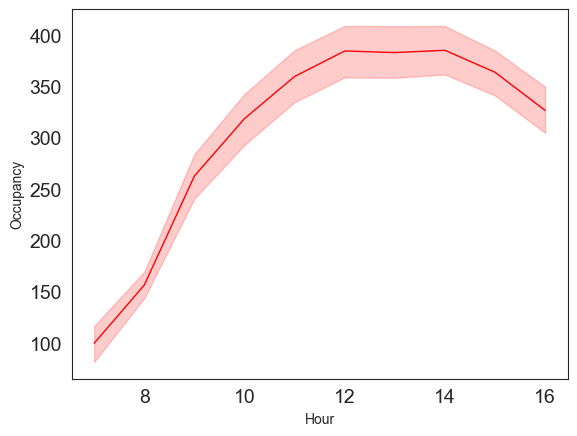

In [43]:
sns.lineplot(x=park.Hour,y=park.Occupancy,lw=1,color='red')

<Axes: xlabel='Hour', ylabel='Occupancy'>

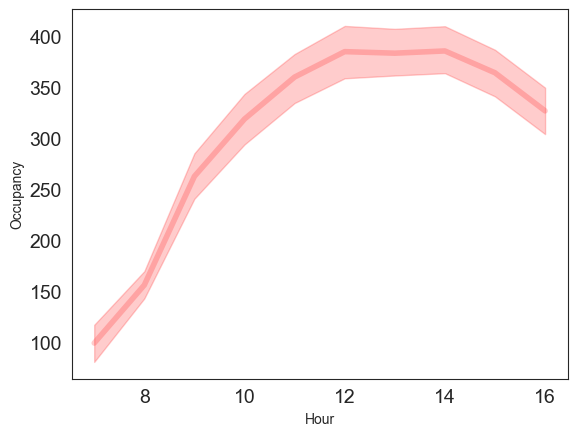

In [44]:
#Alpha 
sns.lineplot(x=park.Hour,y=park.Occupancy,lw=4,color='red',
             alpha=0.2)